# Perona Malik Diffusion for Edge Detection

See [the paper](http://image.diku.dk/imagecanon/material/PeronaMalik1990.pdf)

In [1]:
from anisotropic_diffusion_utils import Diffusion, filter_mid, load_itk, plot, phi_1, phi_2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

### Load the image

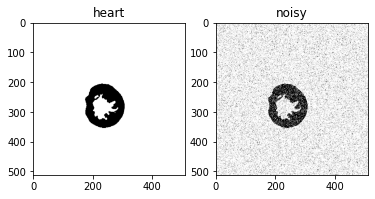

In [2]:
img = load_itk("lvwall.mha")
sli = img[int(2*img.shape[0]/3), ...]
sli = sli/np.max(sli)

# Add noise
noise_img = random_noise(sli, mode='s&p', amount=0.3)

# Plot
plot(
    {"title": "heart", "image": sli},
    {"title": "noisy", "image": noise_img},
)

### Compute the anisotropic diffusion

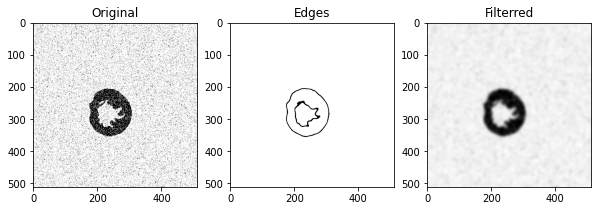

In [3]:
img = Diffusion(noise_img, n=50, g=phi_1, lamb=0.2, k=50)
edges = filter_mid(img, eps=0.1)

plot(
    {"title": "Original", "image": noise_img},
    {"title": "Edges", "image": edges},
    {"title": "Filterred", "image": img},  #, "cmap": "coolwarm"},
    figsize=(10, 5),
)